In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 261MB/s]
100% 1.06G/1.06G [00:06<00:00, 182MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [22]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 86ms/step - loss: 0.6172 - accuracy: 0.6509 - val_loss: 0.5508 - val_accuracy: 0.7198
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.5013 - accuracy: 0.7538 - val_loss: 0.4909 - val_accuracy: 0.7764
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3856 - accuracy: 0.8239 - val_loss: 0.4556 - val_accuracy: 0.7938
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2529 - accuracy: 0.8934 - val_loss: 0.5704 - val_accuracy: 0.7812
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1372 - accuracy: 0.9457 - val_loss: 0.8270 - val_accuracy: 0.7856
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0828 - accuracy: 0.9704 - val_loss: 1.0015 - val_accuracy: 0.7868
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 1.1136 - val_accuracy:

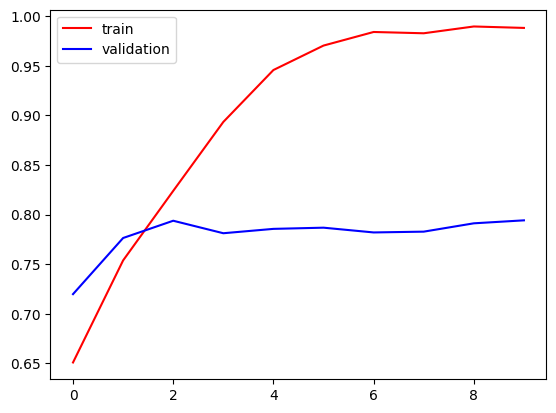

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

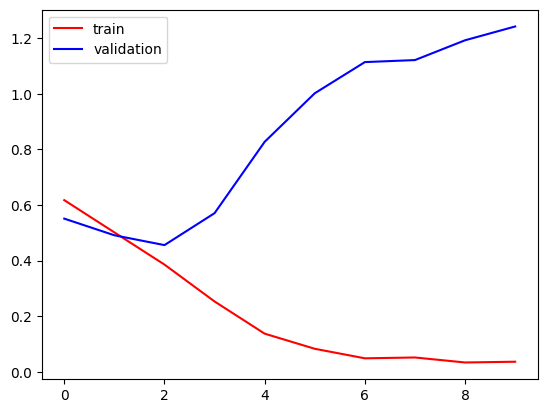

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import cv2

In [59]:
test_img = cv2.imread('/content/dog.jpg')

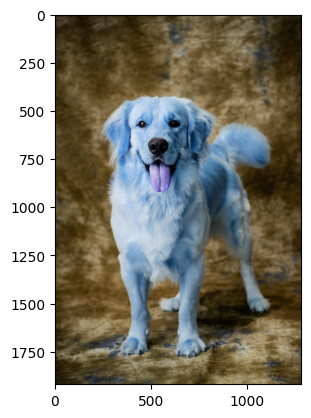

In [60]:
plt.imshow(test_img)

In [61]:
test_img.shape

(1920, 1280, 3)

In [62]:
test_img = cv2.resize(test_img,(256,256))

In [63]:
test_input = test_img.reshape((1,256,256,3))

In [64]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)